### 4.7. KẾT HỢP CÁC TẬP DỮ LIỆU TRONG PANDAS

_Notebook này bám đúng khung mục 4.7 của tài liệu gốc (.docx). Các ví dụ được trình bày theo thứ tự mục 4.7.1 → 4.7.2. Những ghi chú chỉnh kỹ thuật đã thống nhất trong **red review** được chèn dưới dạng **NOTE** song ngữ._

#### Một trong những vấn đề quan trọng trong Data Science đó là kết hợp các bộ dữ liệu từ các nguồn khác nhau. 
> Pandas xây dựng Series và DataFrame tương thích hoàn toàn với các kiểu kết hợp dữ liệu nhỏ (concatenating) hay các tập dữ liệu lớn dạng database-style (merging).
**Learning outcomes**
- Phân biệt `concat`, `merge`, `join` và khi nào dùng mỗi phương pháp.
- Vận dụng các tham số quan trọng: `axis`, `join`, `ignore_index`, `verify_integrity`, `on`, `left_on/right_on`, `left_index/right_index`, `how`, `suffixes`, `validate`.
- Nhận diện rủi ro trùng khóa và cách kiểm tra.

## **4.7.1. Kết hợp dữ liệu đơn giản (Concatenating)**

>### a) Phương thức `concat()` trong Pandas
#### Phương thức **pd.concat()** được sử dụng để xếp chồng **(stacking)** các đối tượng Series hoặc DataFrame dọc theo một trục.
#### Cú pháp:
```python
pd.concat(objs,axis=0, join='outer', ignore_index=False,
          keys=None, levels=None, names=None,
          verify_integrity=False, copy=None)
```
Trong đó:

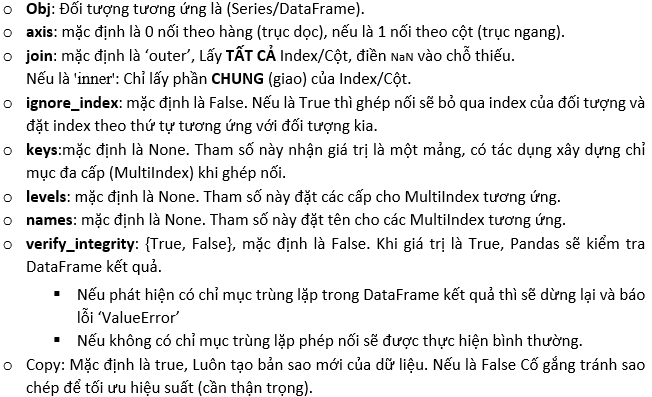




#### Ví dụ 4.7.1.1 — Ghép 2 Series (concat theo hàng)

In [1]:
import pandas as pd
sr1 = pd.Series(['Đ','H','K','T'], index=[1,2,3,4])
sr2 = pd.Series(['K','T','C','N'], index=[5,6,7,8])


In [2]:
sr1

1    Đ
2    H
3    K
4    T
dtype: object

In [3]:
sr2

5    K
6    T
7    C
8    N
dtype: object

In [4]:
pd.concat([sr1, sr2])

1    Đ
2    H
3    K
4    T
5    K
6    T
7    C
8    N
dtype: object

**🟢 Lưu ý**: `concat` **bảo toàn Index** gốc (không tự reset).

#### Ví dụ 4.7.1.2 — Nối 2 DataFrame (axis=0/1)

In [5]:
import pandas as pd
A = pd.DataFrame([['A0','B0'],['A1','B1']], columns=['A','B'])
B = pd.DataFrame([['A2','B2'],['A3','B3']], columns=['A','B'])

In [6]:
A

,A,B
0,A0,B0
1,A1,B1


In [7]:
B

,A,B
0,A2,B2
1,A3,B3


In [8]:
pd.concat([A, B])

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [9]:
print('\nNối A và B theo cột (axis=1):')
display(pd.concat([A, B], axis=1))


Nối A và B theo cột (axis=1):


,A,B,A,B
0,A0,B0,A2,B2
1,A1,B1,A3,B3


**🟢 Lưu ý**: 
* `axis=0` → xếp chồng **hàng**; (Dọc xuống thêm bản ghi)  (attachment:image.png)
* `axis=1` → ghép **cột** (ngang qua/thêm trường) theo **Index**.

#### Trực quan
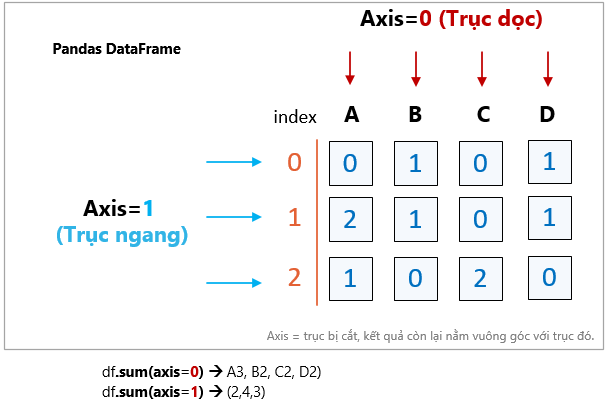

In [10]:
data=[[0,1,0,1],
      [2,1,0,1],
      [1,0,2,0]]
df = pd.DataFrame(data, columns=['A','B','C','D'])
df

,A,B,C,D
0,0,1,0,1
1,2,1,0,1
2,1,0,2,0


In [11]:
df.sum(axis=0)

A    3
B    2
C    2
D    2
dtype: int64

In [12]:
df.sum(axis=1)

0    2
1    4
2    3
dtype: int64

In [13]:
pd.concat([A, B])

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


#### Ví dụ 4.7.1.3 — `ignore_index=True` (reset chỉ mục mới)

In [14]:
pd.concat([A, B], ignore_index=True) #Nối theo hàng reset lại chỉ mục.

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


🟢 Khi `ignore_index=True`, Pandas gán Index mới 0..n−1.

#### Ví dụ 4.7.1.4 — `verify_integrity=True` (phát hiện trùng Index)

In [15]:
print(A)
print(B)

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3


In [16]:
pd.concat([A, B])

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [17]:
try:
    pd.concat([A, B], verify_integrity=True)
except ValueError as e:
    print('Lỗi ValueError:', e)

Lỗi ValueError: Indexes have overlapping values: Index([0, 1], dtype='int64')


**🟠 Lưu ý**: Khi `verify_integrity=True` Pandas sẽ kiểm tra trùng Index và báo lỗi ValueError nếu phát hiện trùng.

#### Ví dụ 4.7.1.5 — `keys` tạo MultiIndex khi concat

In [18]:
pd.concat([A, B], keys=['Data A', 'Data B'])

A   B
Data A 0  A0  B0
       1  A1  B1
Data B 0  A2  B2
       1  A3  B3

**🟢 Lưu ý**: `keys` tạo **MultiIndex** ở cấp ngoài để phân biệt từng DataFrame.

> ### b) Phương thức `append()` (**Đã bị loại bỏ** )

#### Ví dụ 4.7.1.6 — `append()` (đã bị loại bỏ từ Pandas 2.0)

In [19]:
# Ví dụ minh họa cú pháp lịch sử (sẽ báo cảnh báo/lỗi trên Pandas ≥ 2.0)
try:
    display(A.append(B))
except Exception as e:
    print('append() không còn hỗ trợ trong Pandas mới:', e)

append() không còn hỗ trợ trong Pandas mới: 'DataFrame' object has no attribute 'append'


#### 🟠 **Lưu ý**: `DataFrame.append()`**đã bị loại bỏ** từ Pandas 2.0. 
>#### ***Hãy sử dụng `pd.concat([A, B], ignore_index=True)` để thay thế!***.


### Quiz 4.7.1 (3 câu, trắc nghiệm nhanh)
- **Q1.** `pd.concat([A,B], axis=1)` mặc định sẽ dùng kiểu `join` nào trên Index?
  - (A) inner  (B) outer  (C) left  (D) right  
  **Gợi ý**: outer là mặc định.
- **Q2.** Tác dụng của `verify_integrity=True` là gì?
  - (A) Sao chép dữ liệu  (B) Kiểm tra trùng Index và báo lỗi  (C) Reset Index  (D) Gộp cột
- **Q3.** `append()` hiện nay có nên sử dụng không? Vì sao?
  - Trả lời ngắn: Không, đã bị loại bỏ; thay bằng `pd.concat`.

## **4.7.2. Kết hợp dữ liệu dạng database-style (Merging)**
**NOTE / 🟢 BỔ SUNG 🇻🇳**: `merge()` trong Pandas tương tự lệnh **JOIN** trong SQL: ghép theo khóa chung.

>### a) One-to-one (1–1)

#### Ví dụ 4.7.2.1 — Ghép df1 và df2 **theo cột trùng tên** (‘Nhân viên’)

In [20]:
import pandas as pd
df1 = pd.DataFrame({
    'Nhân viên':['Bình','Minh','Lan','Vân'],
    'Phòng/Ban':['Kế toán','Kỹ thuật','Kỹ thuật','HCQT']
})
df2 = pd.DataFrame({
    'Nhân viên':['Bình','Minh','Lan','Vân'],
    'Năm':[2020,2010,2004,2011]
})

In [21]:
df1

,Nhân viên,Phòng/Ban
0,Bình,Kế toán
1,Minh,Kỹ thuật
2,Lan,Kỹ thuật
3,Vân,HCQT


In [22]:
df2

,Nhân viên,Năm
0,Bình,2020
1,Minh,2010
2,Lan,2004
3,Vân,2011


In [23]:
nhanvien=pd.merge(df1, df2)
nhanvien                            #nhanvien df3

,Nhân viên,Phòng/Ban,Năm
0,Bình,Kế toán,2020
1,Minh,Kỹ thuật,2010
2,Lan,Kỹ thuật,2004
3,Vân,HCQT,2011


#### **🟢 Lưu ý**: Khi hai bảng có **cột khóa trùng tên**, Pandas tự động nhận diện và ghép theo cột đó.
#### **🟢 NOTE**: If both frames share the **same-named key**, Pandas auto-detects and merges on it.

>### b) **One-to-Many** và **Many-to-One**
#### **Định nghĩa**: Mối **quan hệ One-to-Many (1:N)** xảy ra khi gộp (merge) hai DataFrame, trong đó:
* #### DataFrame "Một" (One-side):có *cột khóa được dùng để gộp* (**merge key**) *chứa các giá trị duy nhất* (**`unique values`**) – *mỗi giá trị chỉ xuất hiện một lần*.
* #### DataFrame "Nhiều" (Many-side): **có cùng cột khóa được dùng để gộp**, nhưng *cột này chứa các giá trị trùng lặp* (`duplicate values`) – *mỗi giá trị khóa có thể xuất hiện nhiều lần.*

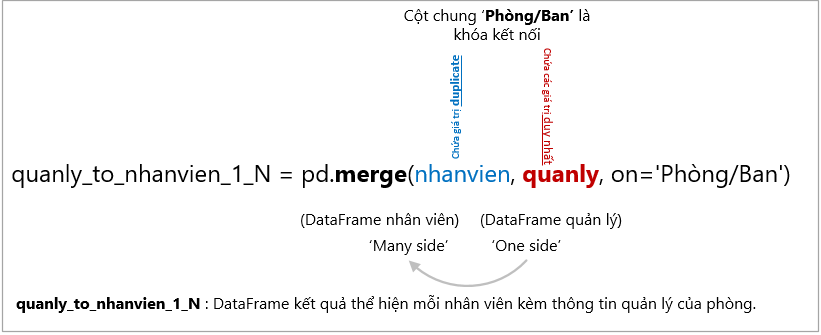

#### **Ví dụ 4.7.2.2** — **One-to-many** (Phòng/Ban → nhiều Nhân viên)

In [24]:
#1. DataFrame "Một" (One-side)
quanly = pd.DataFrame({
    'Phòng/Ban':['Kế toán','Kỹ thuật','HCQT'],              #Cột khóa chung để gộp 'Phòng/Ban'
    'Quản lý':['Ly','Cường','Minh']
})
quanly

,Phòng/Ban,Quản lý
0,Kế toán,Ly
1,Kỹ thuật,Cường
2,HCQT,Minh


In [25]:
#2. DataFrame 'Nhiều' (One-Many)
nhanvien

,Nhân viên,Phòng/Ban,Năm
0,Bình,Kế toán,2020
1,Minh,Kỹ thuật,2010
2,Lan,Kỹ thuật,2004
3,Vân,HCQT,2011


Nhận xét: Cột 'Phòng/Ban' trong dataframe nhanvien có 2 giá trị lặp lại 'Kỹ thuật', tức là: có 2 nhân viên cùng phòng kỹ thuật (Minh, Lan)
> * #### Thực hiện phép nối One-to-Many giữa dataframe **One(quanly)** với dataframe **Many(nhanvien)**

In [26]:
quanly_to_nhanvien_1_N = pd.merge(nhanvien, quanly, on='Phòng/Ban')
quanly_to_nhanvien_1_N

,Nhân viên,Phòng/Ban,Năm,Quản lý
0,Bình,Kế toán,2020,Ly
1,Minh,Kỹ thuật,2010,Cường
2,Lan,Kỹ thuật,2004,Cường
3,Vân,HCQT,2011,Minh


#### **🟢 Lưu ý**: Một phòng/ban có thể có **nhiều nhân viên** khớp → quan hệ 1–n.
#### **🟢NOTE**: A department matches **many employees** → one-to-many relationship.

Định nghĩa quan hệ : Many to One

| **Tiêu chí**       | **DataFrame "Nhiều" (Many-side)**                          | **DataFrame "Một" (One-side)**                             |
|--------------------|------------------------------------------------------------|------------------------------------------------------------|
| **Ví dụ**          | Nhân viên, Đơn hàng                                        | Phòng Ban                                                  |
| **Cột khóa**       | Chứa các giá trị **trùng lặp** (duplicate values)          | Chứa các giá trị **duy nhất** (unique values)              |
| **Ý nghĩa**        | Nhiều hàng ở đây **tham chiếu đến cùng một giá trị** ở phía "One" | Mỗi hàng ở đây có thể được **tham chiếu bởi nhiều hàng** ở phía "Many" |



#### Ví dụ 4.7.2.3 — Many-to-one (ngược lại)

In [27]:
#1. DataFrame nhanvien: 'Nhiều' (Many-side)
#Cột khóa 'Phòng/Ban' có giá trị 'Kỹ thuật' lặp 2 lần (Duplicate), mỗi phòng/ban có nhiều nhân viên
nhanvien

,Nhân viên,Phòng/Ban,Năm
0,Bình,Kế toán,2020
1,Minh,Kỹ thuật,2010
2,Lan,Kỹ thuật,2004
3,Vân,HCQT,2011


In [28]:
#2. Dataframe: quanly: 'Một' (One-side)
#Cột khóa chung 'Phòng/Ban chỉ có giá trị duy nhất (mỗi phòng duy nhất 1 quản lý)
quanly

,Phòng/Ban,Quản lý
0,Kế toán,Ly
1,Kỹ thuật,Cường
2,HCQT,Minh


In [29]:
#3. Kết nối Many-to_One giữa dataframe nhanvien và dataFrame quanly
nhan_vien_to_quanly_N_1=pd.merge(nhanvien,quanly)
nhan_vien_to_quanly_N_1

,Nhân viên,Phòng/Ban,Năm,Quản lý
0,Bình,Kế toán,2020,Ly
1,Minh,Kỹ thuật,2010,Cường
2,Lan,Kỹ thuật,2004,Cường
3,Vân,HCQT,2011,Minh


#### **🟢 BỔ SUNG**: Số dòng kết quả bằng số dòng bảng **bên trái** khi khóa không làm tăng số bản ghi.
#### **🟢 NOTE**: Result row count equals the **left** table when keys do not multiply records.

### Một số tùy chọn khi sử dụng `merge()`

#### Ví dụ 4.7.2.4 — Tham số `on` (khóa trùng tên) & `left_on/right_on` (khóa khác tên)

In [30]:
nv_salary = pd.DataFrame({
    'Name':['Bình','Minh','Lan','Vân'],
    'Lương':[18,20,22,16]
})
m1 = pd.merge(df1, df2, on='Nhân viên')

m1.head()

,Nhân viên,Phòng/Ban,Năm
0,Bình,Kế toán,2020
1,Minh,Kỹ thuật,2010
2,Lan,Kỹ thuật,2004
3,Vân,HCQT,2011


In [31]:
df1

,Nhân viên,Phòng/Ban
0,Bình,Kế toán
1,Minh,Kỹ thuật
2,Lan,Kỹ thuật
3,Vân,HCQT


In [32]:
nv_salary

,Name,Lương
0,Bình,18
1,Minh,20
2,Lan,22
3,Vân,16


In [33]:
m2 = pd.merge(df1, nv_salary, left_on='Nhân viên', right_on='Name')  #Ghép khóa khác tên
m2.head()

,Nhân viên,Phòng/Ban,Name,Lương
0,Bình,Kế toán,Bình,18
1,Minh,Kỹ thuật,Minh,20
2,Lan,Kỹ thuật,Lan,22
3,Vân,HCQT,Vân,16


#### **🟢 BỔ SUNG**: Dùng `on` khi tên cột khóa **giống nhau**; dùng `left_on/right_on` khi **khác tên**.
#### **🟢 NOTE**: Use `on` if key names **match**; use `left_on/right_on` if **different**.

#### Ví dụ 4.7.2.5 — Xóa cột dư thừa sau khi merge khác tên

In [34]:
m2_drop = m2.drop(columns=['Name'])
m2_drop.head()

,Nhân viên,Phòng/Ban,Lương
0,Bình,Kế toán,18
1,Minh,Kỹ thuật,20
2,Lan,Kỹ thuật,22
3,Vân,HCQT,16


#### Xóa cột `Name` để tránh **trùng thông tin** sau `left_on/right_on`.

#### Ví dụ 4.7.2.6 — `left_index/right_index` và `join()`

In [35]:
df1_idx = df1.set_index('Nhân viên')
df2_idx = df2.set_index('Nhân viên')

In [36]:
df1_idx

,Phòng/Ban
Nhân viên,
Bình,Kế toán
Minh,Kỹ thuật
Lan,Kỹ thuật
Vân,HCQT


In [37]:
df2_idx

,Năm
Nhân viên,
Bình,2020
Minh,2010
Lan,2004
Vân,2011


In [38]:
m_idx = pd.merge(df1_idx, df2_idx, left_index=True, right_index=True)
m_idx

,Phòng/Ban,Năm
Nhân viên,,
Bình,Kế toán,2020
Minh,Kỹ thuật,2010
Lan,Kỹ thuật,2004
Vân,HCQT,2011


In [39]:
j_idx = df1_idx.join(df2_idx)  # tương đương left join theo Index
j_idx.head()

,Phòng/Ban,Năm
Nhân viên,,
Bình,Kế toán,2020
Minh,Kỹ thuật,2010
Lan,Kỹ thuật,2004
Vân,HCQT,2011


* #### Khi cả hai bảng **đã có Index phù hợp**, có thể ghép theo Index.
``` Python
        df1_idx.join(df2_idx) tương đương pd.merge(df1_idx, df2_idx, left_index=True, right_index=True, how='left').

#### Ví dụ 4.7.2.7 — Kết hợp giữa Index và cột (lai ghép)
##### Ghép **Index** của `df2_idx` với **cột** `Name` của `nv_salary`.

In [40]:
df2_idx

,Năm
Nhân viên,
Bình,2020
Minh,2010
Lan,2004
Vân,2011


In [41]:
nv_salary

,Name,Lương
0,Bình,18
1,Minh,20
2,Lan,22
3,Vân,16


In [42]:
mixed = pd.merge(df2_idx, nv_salary, left_index=True, right_on='Name')
mixed.head()

,Năm,Name,Lương
0,2020,Bình,18
1,2010,Minh,20
2,2004,Lan,22
3,2011,Vân,16


* >#### Tham số : **`how`** với (`inner`, `outer`, `left`, `right`)
**🔴 Bảng tổng hợp** 

| how | Mô tả (VN) | Kept side |
|-----|------------|-----------|
| inner | Lấy phần **giao** | both |
| outer | Lấy **hợp** tất cả | both |
| left | Giữ toàn bộ bên **trái** | left |
| right | Giữ toàn bộ bên **phải** | right |

#### Ví dụ 4.7.2.8–4.7.2.11 — Minh họa `how` (`inner`, `outer`, `left`, `right`)

In [43]:
nv_location = pd.DataFrame({
    'Nhân viên':['Bình','Minh','Lan','Vân'],
    'Nơi sinh':['Hà Nội','Hải Phòng','Nam Định','Đà Nẵng']
})
nv_age = pd.DataFrame({
    'Nhân viên':['Bình','Lan','Vân','Hà'],
    'Tuổi':[28,25,30,27]
})

In [44]:
nv_location

,Nhân viên,Nơi sinh
0,Bình,Hà Nội
1,Minh,Hải Phòng
2,Lan,Nam Định
3,Vân,Đà Nẵng


In [45]:
nv_age

,Nhân viên,Tuổi
0,Bình,28
1,Lan,25
2,Vân,30
3,Hà,27


In [46]:
inner = pd.merge(nv_location, nv_age, on='Nhân viên', how='inner')
print('INNER:'); display(inner)

INNER:


,Nhân viên,Nơi sinh,Tuổi
0,Bình,Hà Nội,28
1,Lan,Nam Định,25
2,Vân,Đà Nẵng,30


In [47]:
outer = pd.merge(nv_location, nv_age, on='Nhân viên', how='outer')
print('OUTER:'); display(outer)

OUTER:


,Nhân viên,Nơi sinh,Tuổi
0,Bình,Hà Nội,28.0
1,Hà,NaN,27.0
2,Lan,Nam Định,25.0
3,Minh,Hải Phòng,NaN
4,Vân,Đà Nẵng,30.0


In [48]:
left  = pd.merge(nv_location, nv_age, on='Nhân viên', how='left')
print('LEFT:'); display(left)

LEFT:


,Nhân viên,Nơi sinh,Tuổi
0,Bình,Hà Nội,28.0
1,Minh,Hải Phòng,NaN
2,Lan,Nam Định,25.0
3,Vân,Đà Nẵng,30.0


In [49]:
right = pd.merge(nv_location, nv_age, on='Nhân viên', how='right')
print('RIGHT:'); display(right)

RIGHT:


,Nhân viên,Nơi sinh,Tuổi
0,Bình,Hà Nội,28
1,Lan,Nam Định,25
2,Vân,Đà Nẵng,30
3,Hà,NaN,27


#### Ví dụ 4.7.2.12–4.7.2.13 — `suffixes` (tránh trùng tên cột)

In [50]:
vang_rank = pd.DataFrame({'Nhân viên':['Bình','Lan','Hà'],'rank':[1,2,3]})
hs_rank   = pd.DataFrame({'Nhân viên':['Bình','Lan','Hà'],'rank':[4,5,6]})

In [51]:
vang_rank

,Nhân viên,rank
0,Bình,1
1,Lan,2
2,Hà,3


In [52]:
hs_rank

,Nhân viên,rank
0,Bình,4
1,Lan,5
2,Hà,6


In [53]:
default_suffix = pd.merge(vang_rank, hs_rank, on='Nhân viên')
default_suffix

,Nhân viên,rank_x,rank_y
0,Bình,1,4
1,Lan,2,5
2,Hà,3,6


**🟢 Ghi chú**: Nếu trùng tên cột, Pandas gán hậu tố **`_x`, `_y`**; có thể đổi bằng `suffixes=(...)`.

In [54]:
custom_suffix  = pd.merge(vang_rank, hs_rank, on='Nhân viên', suffixes=('_Ngày vắng','_Hiệu suất'))
print('Mặc định (_x, _y):'); display(default_suffix)
print('Tùy chỉnh suffixes:'); display(custom_suffix)

Mặc định (_x, _y):


,Nhân viên,rank_x,rank_y
0,Bình,1,4
1,Lan,2,5
2,Hà,3,6


Tùy chỉnh suffixes:


,Nhân viên,rank_Ngày vắng,rank_Hiệu suất
0,Bình,1,4
1,Lan,2,5
2,Hà,3,6


### (Tuỳ chọn) Kiểm tra quan hệ bằng `validate` 
#### **🟢 Ghi chú🇻🇳**: `validate` giúp **ép kiểu quan hệ** (`one_to_one`, `one_to_many`, …) để **phát hiện sai thiết kế dữ liệu**.

In [55]:
try:
    # Ví dụ: ép quan hệ one-to-one, sẽ báo lỗi nếu trùng khóa ở bất kỳ phía nào
    pd.merge(vang_rank, hs_rank, on='Nhân viên', validate='one_to_one')
    print('OK: one_to_one')
except Exception as e:
    print('Lỗi validate:', e)

OK: one_to_one


### Quiz 4.7.2 (3 câu)
- **Q1.** Trong `merge`, khi khoá ở hai bảng khác tên, Anh/Chị dùng tham số nào?
  - (A) on  (B) left_on/right_on  (C) left_index/right_index  (D) suffixes
- **Q2.** `join()` mặc định tương đương với `merge` kiểu nào trên Index?
  - (A) inner  (B) outer  (C) left  (D) right
- **Q3.** Tác dụng của `suffixes` là gì?
  - (A) Xoá cột trùng  (B) Đổi tên cột trùng bằng hậu tố  (C) Kiểm tra quan hệ  (D) Gộp hàng